# Exploration 3. 귀여운 고양이 수염 사진 만들기~!

## 1. 고양이 수염과 내 사진을 저장한다. 

$ cd ~/cd aiffel/camera_sticker/Image

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


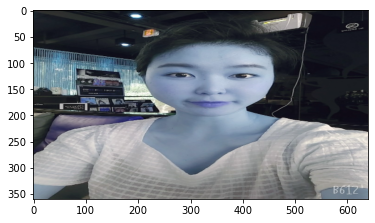

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

### 이미지가 옆으로 넓어서 사이즈를 변경해야해!!

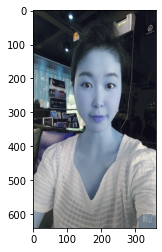

In [3]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (360, 640))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

### 칼라가 이상하지?? 이것도 RGB로 바꾸자~!

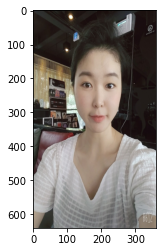

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. 사진에 얼굴 검출 & 랜드마크 설정하기

### 먼저, dlib을 활용해 hog detector를 선언을 해야함.

In [5]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


### detector를 이용해서 얼굴의 bounding box를 추출해보자.

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


### 사진에서 얼굴위치 찾기!!

rectangles[[(115, 184) (270, 339)]]


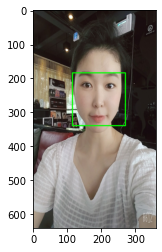

In [7]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 저장한 랜드마크 모델 불러오기!!

In [8]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [9]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


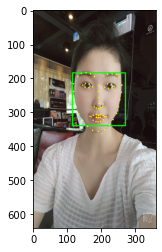

In [10]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. 스티커 적용할 위치 찾기~~!

### 코의 위치를 기준으로 왕관의 위치를 설정했다면, 고양이 수염은 코의 위치에 설정해보자! ㅡLㅡ
내 사진의 코의 위치가 아래와 같이 나옴 

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0] 
    y = landmark[30][1] - dlib_rect.width()//4
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(193, 274)
(x,y) : (193,235)
(w,h) : (156,156)


### 고양이 사진의 크기도 설정해주기~

In [12]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


### 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정하기 (이미지 시작점은 top-left 좌표)

In [13]:
refined_x = x - w // 2  # left
refined_y = y - h     # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (115,79)


### (음수좌표 제거)

In [14]:
#img_sticker = img_sticker[-refined_y:]
#print (img_sticker.shape)

### top 의 y 좌표는 원본 이미지의 경계 값으로 수정함

In [15]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (115,0)


### 원본 이미지에 스티커를 적용

In [16]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

### 사진이 들어간 위치를 확인해볼까~~?

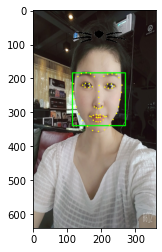

In [17]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

와우... 머리에서 안내려오네~ ^^ 처음엔 수염이 없는줄 .. 
한 시간째 머리에 달린 수염을 내리는데 열중하고 있다.... 

## 4. 고양이수염 스티커 사진에 붙이기 !!

In [19]:
sticker_area = img_bgr[refined_y:refined_y+img_stricker.shape[0]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow[refined_y:refined_y+img_stricker.shape[0]]
plt.show()

NameError: name 'img_stricker' is not defined

## 5. 프로젝트를 마치며 ... 